In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 로아 내 기본변수
min_s_rate = 1 # 최소확률
max_s_rate = 2 # 최대확률

gahomax = 8 # 가호 최대 개수

In [3]:
# 로아 내 강화재료 가격
stone_gold = 1.9 # 파괴수호석 (1개당)
debri_gold = 645/1500 # 파편 (1개당)
dolpa_gold = 29 # 돌파석 (1개당)
oreha_gold = 14 # 오레하 (1개당)

# 로아 내 추가재료 가격 (추후 반영)
gahogold = 340
chukgold = 180
eungold = 72

In [4]:
# 재련당 재료 투하
stones = 1300
debris = 1054
dolpa = 32
oreha = 20
gold = 730 # 재련 당 골드

In [5]:
# 로아 내 기본상수
k_rate = np.arange(1, 601) * .005
step_s_rate = (max_s_rate - min_s_rate) / 10

chukmax = gahomax * 3
eunmax = gahomax * 6

gaho_rate, chuk_rate, eun_rate = min_s_rate / 3 / gahomax, min_s_rate / 3 / chukmax, min_s_rate / 3 / eunmax

spending = stone_gold*stones + debri_gold*debris + dolpa_gold*dolpa + oreha_gold*oreha + gold # 강화당 소모 골드
spending_full = spending + gahogold*gahomax + chukgold*chukmax + eungold*eunmax # 강화당 소모 골드(풀숨)

In [6]:
s_rate = np.concatenate((np.arange(min_s_rate, max_s_rate, step_s_rate), np.ones(990) * max_s_rate)) / 100 # 각 시도별 성공확률
s_rate_full = s_rate + (max_s_rate - min_s_rate) / 100  # 각 시도별 성공확률(풀숨)

k = np.outer(k_rate, np.concatenate(([0], s_rate[:-1]))) # 각 시도별 장인의 기운 누적량
k_full = np.outer(k_rate, np.concatenate(([0], s_rate_full[:-1]))) # 각 시도별 장인의 기운 누적량(풀숨)

In [7]:
s_rate_mat = np.diag(s_rate)

for i in range(s_rate_mat.shape[0]):
    for j in range(i):
        s_rate_mat[i,j] = s_rate_mat[j,j]

all_success = 1 - (1 - s_rate_mat).prod(axis = 1) # i+1 회 이내에 강화성공확률

In [8]:
s_rate_full_mat = np.diag(s_rate_full)

for i in range(s_rate_full_mat.shape[0]):
    for j in range(i):
        s_rate_full_mat[i,j] = s_rate_full_mat[j,j]

all_success_full = 1 - (1 - s_rate_full_mat).prod(axis = 1) # i+1 회 이내에 강화성공확률(풀숨)

In [9]:
k_rate_mat = np.zeros((*k.shape, k.shape[1]))
nth_kiwoon = np.zeros(k.shape)
for i in range(k_rate_mat.shape[0]):
    if i % 5 == 0:
        print('{:03d}'.format(i), end = '\r')
    k_rate_mat[i] = np.diag(k[i])
    for ii in range(k_rate_mat.shape[1]):
        for iii in range(ii):
            k_rate_mat[i, ii, iii] = k[i, iii]
    nth_kiwoon[i] = k_rate_mat[i].sum(axis = 1) # i+1 회시에 장인의 기운 누적량

In [10]:
k_rate_full_mat = np.zeros((*k_full.shape, k_full.shape[1]))
nth_kiwoon_full = np.zeros(k_full.shape)
for i in range(k_rate_full_mat.shape[0]):
    if i % 5 == 0:
        print('{:03d}'.format(i), end = '\r')
    k_rate_full_mat[i] = np.diag(k_full[i])
    for ii in range(k_rate_full_mat.shape[1]):
        for iii in range(ii):
            k_rate_full_mat[i, ii, iii] = k_full[i, iii]
    nth_kiwoon_full[i] = k_rate_full_mat[i].sum(axis = 1) # i+1 회시에 장인의 기운 누적량(풀숨)

In [11]:
ki100 = (nth_kiwoon < 1).sum(axis = 1) + 1 # 장기백 달성 강화 시도 횟수
ki100_full = (nth_kiwoon_full < 1).sum(axis = 1) + 1 # 장기백 달성 강화 시도 횟수(풀숨)

(0.0, 200.0)

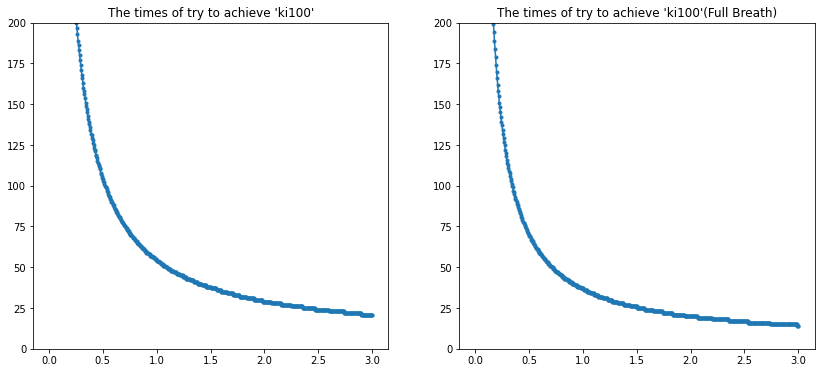

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(k_rate, ki100, '.-')
ax[0].set_title('The times of try to achieve \'ki100\'')
ax[0].set_ylim([0, 200])

ax[1].plot(k_rate, ki100_full, '.-')
ax[1].set_title('The times of try to achieve \'ki100\'(Full Breath)')
ax[1].set_ylim([0, 200])

In [13]:
# 장기백 사이즈로 결과값 재조정
ls_all_success = np.zeros((len(ki100), len(all_success)))
ls_all_success[:] = np.nan
ls_nth_kiwoon = np.zeros((len(ki100), len(all_success)))
ls_s_rate_mat = np.empty((len(ki100), len(all_success), len(all_success)))
ls_s_rate_mat[:] = np.nan

for i in range(len(ki100)):
    ls_all_success[i] = np.where(np.arange(len(all_success)) < ki100[i], all_success, False)
    ls_nth_kiwoon[i] = np.where(np.arange(len(nth_kiwoon[i])) < ki100[i], nth_kiwoon[i], False)
    ls_s_rate_mat[i, :ki100[i], :ki100[i]] = s_rate_mat[:ki100[i], :ki100[i]]

    try:
        ls_all_success[i, ki100[i]] = 1 # 마지막 재련은 강화확률 1
    except:
        pass
    
ls_all_success[ls_all_success == 0] = np.nan

In [14]:
# 장기백 사이즈로 결과값 재조정(풀숨)
ls_all_success_full = np.zeros((len(ki100_full), len(all_success_full)))
ls_all_success_full[:] = np.nan
ls_nth_kiwoon_full = np.zeros((len(ki100_full), len(all_success_full)))
ls_s_rate_full_mat = np.empty((len(ki100_full), len(all_success_full), len(all_success_full)))
ls_s_rate_full_mat[:] = np.nan

for i in range(len(ki100_full)):
    ls_all_success_full[i] = np.where(np.arange(len(all_success_full)) < ki100_full[i], all_success_full, False)
    ls_nth_kiwoon_full[i] = np.where(np.arange(len(nth_kiwoon_full[i])) < ki100_full[i], nth_kiwoon_full[i], False)
    ls_s_rate_full_mat[i, :ki100_full[i], :ki100_full[i]] = s_rate_mat[:ki100_full[i], :ki100_full[i]]

    try:
        ls_all_success_full[i, ki100_full[i]] = 1 # 마지막 재련은 강화확률 1
    except:
        pass
    
ls_all_success_full[ls_all_success_full == 0] = np.nan

In [15]:
ls_meanmat, ls_nth_success, ls_mean_times = [], [], []

for i in range(len(ki100)):
    meanmat = 1 - ls_s_rate_mat[i, :ki100[i], :ki100[i]]
    meanmat[np.diag_indices(meanmat.shape[0])] = 1 - meanmat[np.diag_indices(meanmat.shape[0])]
    meanmat[-1, -1] = 1
    ls_meanmat.append(meanmat.copy())
    
    nth_success = meanmat.prod(1)
    ls_nth_success.append(nth_success.copy()) # 정확히 i+1 회에 강화성공할 확률
    ls_mean_times.append((nth_success * np.arange(1, 1+len(nth_success))).copy()) # 각 강화횟수별 기대값

In [16]:
ls_meanmat_full, ls_nth_success_full, ls_mean_times_full = [], [], []

for i in range(len(ki100_full)):
    meanmat_full = 1 - ls_s_rate_full_mat[i, :ki100_full[i], :ki100_full[i]]
    meanmat_full[np.diag_indices(meanmat_full.shape[0])] = 1 - meanmat_full[np.diag_indices(meanmat_full.shape[0])]
    meanmat_full[-1, -1] = 1
    ls_meanmat_full.append(meanmat_full.copy())
    
    nth_success_full = meanmat_full.prod(1)
    ls_nth_success_full.append(nth_success_full.copy())  # 정확히 i+1 회에 강화성공할 확률(풀숨)
    ls_mean_times_full.append((nth_success_full * np.arange(1, 1+len(nth_success_full))).copy()) # 각 강화횟수별 기대값(풀숨)

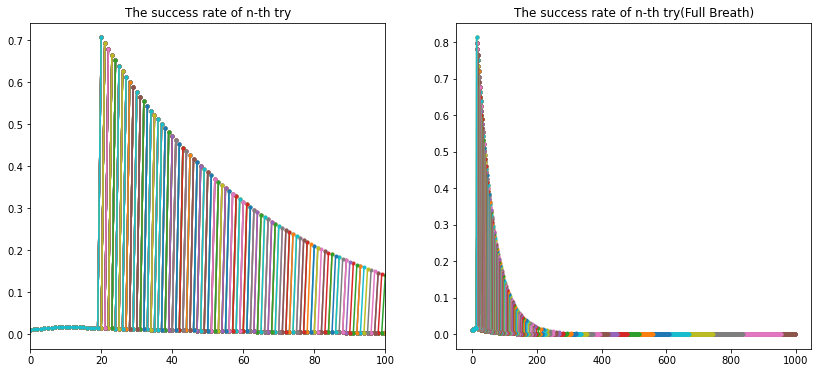

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

for i in range(len(ki100)):
    ax[0].plot(ls_nth_success[i], '.-')
    ax[0].set_title('The success rate of n-th try')
    ax[0].set_xlim([0, 100])

    ax[1].plot(ls_nth_success_full[i], '.-')
    ax[1].set_title('The success rate of n-th try(Full Breath)')

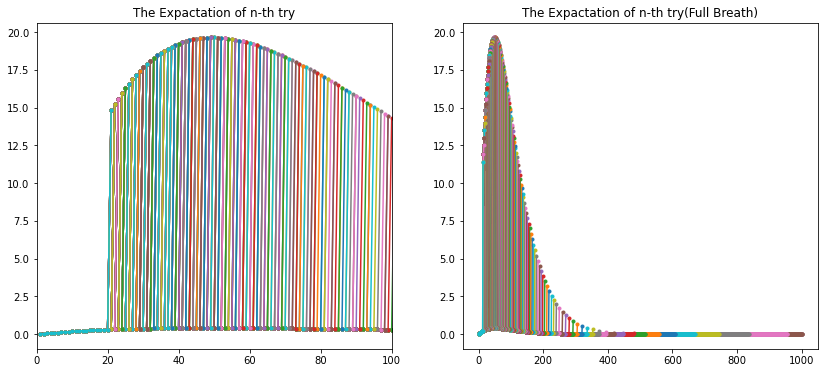

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

for i in range(len(ki100)):
    ax[0].plot(np.arange(1, len(ls_mean_times[i])+1), ls_mean_times[i], '.-')
    ax[0].set_title('The Expactation of n-th try')
    ax[0].set_xlim([0, 100])

    ax[1].plot(np.arange(1, len(ls_mean_times_full[i])+1), ls_mean_times_full[i], '.-')
    ax[1].set_title('The Expactation of n-th try(Full Breath)')

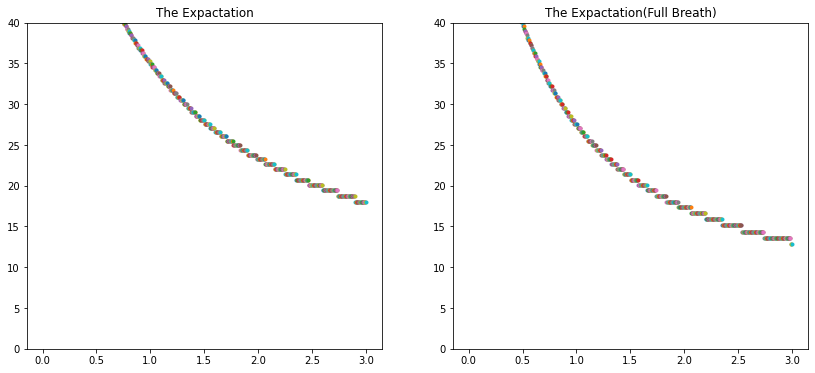

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

for i in range(len(ki100)):
    ax[0].plot(k_rate[i], ls_mean_times[i].sum(), '.-')
    ax[0].set_title('The Expactation')
    ax[0].set_ylim([0, 40])

    ax[1].plot(k_rate[i], ls_mean_times_full[i].sum(), '.-')
    ax[1].set_title('The Expactation(Full Breath)')
    ax[1].set_ylim([0, 40])

(0.0, 50.0)

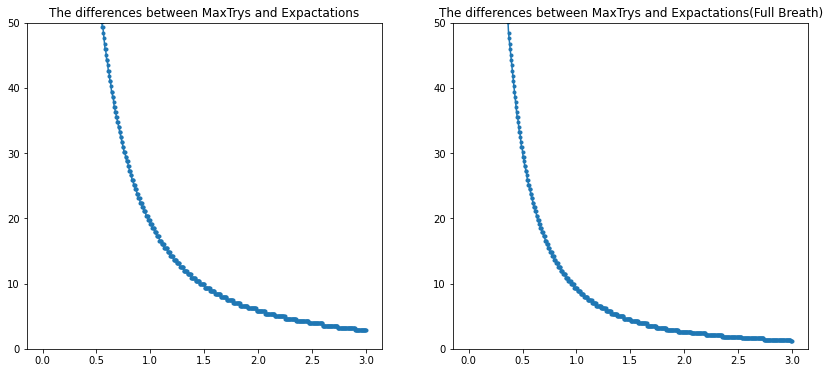

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
diffs, diffs_full = np.zeros(len(ki100)), np.zeros(len(ki100))

for i in range(len(ki100)):
    diffs[i] = ki100[i] - ls_mean_times[i].sum()
    diffs_full[i] = ki100_full[i] - ls_mean_times_full[i].sum()
    
ax[0].plot(k_rate, diffs, '.-')
ax[0].set_title('The differences between MaxTrys and Expactations')
ax[0].set_ylim([0, 50])

ax[1].plot(k_rate, diffs_full, '.-')
ax[1].set_title('The differences between MaxTrys and Expactations(Full Breath)')
ax[1].set_ylim([0, 50])

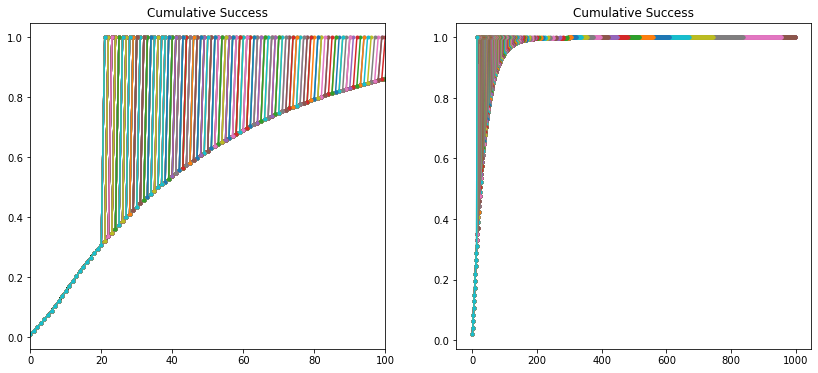

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

for i in range(len(ki100)):
    ax[0].plot(ls_all_success[i], '.-')
    ax[0].set_title('Cumulative Success')
    ax[0].set_xlim([0, 100])
    
    ax[1].plot(ls_all_success_full[i], '.-')
    ax[1].set_title('Cumulative Success')